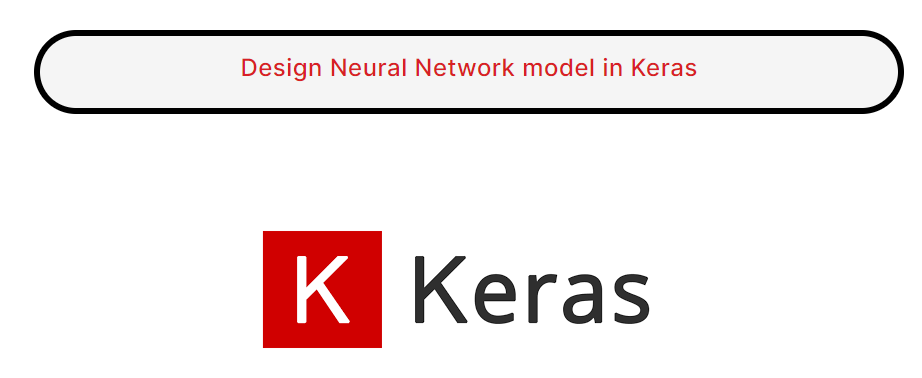


For your convenience, the data can be found here again: 
https://cocl.us/concrete_data

To recap, the predictors in the data of concrete strength include:

>- Cement
>- Blast Furnace Slag
>- Fly Ash
>- Water
>- Superplasticizer
>- Coarse Aggregate
>- Fine Aggregate

<a id = '0'></a>
# Workflow:

>- [1 Imports, Data Loading](#1)
>- [2 Data Understanding](#2)
>- [3 Preprocessing](#3)
>- [4 Exploratory Data Analysis](#4)
>- [5 Model Training and Perfomance](#5)
>  - [5.1 Feature Selection](#5.1)
>  - [5.2 Building the Neural Network](#5.2)
>  - [5.3 Training the Neural Network](#5.3)
>  - [5.4 Evaluating the model performance](#5.4)

<a id = '1'></a>
# [1 Imports, Data Loading](#0)

In [1]:
## Importing dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from ydata_profiling import ProfileReport

# Set plot style
sns.set(color_codes=True)
sns.set_style("darkgrid")
plt.style.use("ggplot")

plt.rcParams['figure.figsize']=15,8
pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.float_format', lambda x: '%.3f' % x)

import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/conda/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


In [2]:
df = pd.read_csv('/kaggle/input/concrete-data/concrete_data.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.000,0.000,0.000,162.000,2.500,1040.000,676.000,28,79.990
1,540.000,0.000,0.000,162.000,2.500,1055.000,676.000,28,61.890
2,332.500,142.500,0.000,228.000,0.000,932.000,594.000,270,40.270
3,332.500,142.500,0.000,228.000,0.000,932.000,594.000,365,41.050
4,198.600,132.400,0.000,192.000,0.000,978.400,825.500,360,44.300


In [3]:
import re
df.rename(columns = lambda x: x.lower(), inplace=True)
df.rename(columns = lambda x: re.sub('\s+', '_', x), inplace=True)
df.rename(columns = {'blast_furnace_slag':'bf_slag'}, inplace=True)
df.columns

Index(['cement', 'bf_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate', 'age', 'strength'],
      dtype='object')


<a id = '2'></a>
# [2 Data Understanding](#0)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   bf_slag           1030 non-null   float64
 2   fly_ash           1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarse_aggregate  1030 non-null   float64
 6   fine_aggregate    1030 non-null   float64
 7   age               1030 non-null   int64  
 8   strength          1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
df.describe()

,cement,bf_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
count,1030.000,1030.000,1030.000,1030.000,1030.000,1030.000,1030.000,1030.000,1030.000
mean,281.168,73.896,54.188,181.567,6.205,972.919,773.580,45.662,35.818
std,104.506,86.279,63.997,21.354,5.974,77.754,80.176,63.170,16.706
min,102.000,0.000,0.000,121.800,0.000,801.000,594.000,1.000,2.330
25%,192.375,0.000,0.000,164.900,0.000,932.000,730.950,7.000,23.710
50%,272.900,22.000,0.000,185.000,6.400,968.000,779.500,28.000,34.445
75%,350.000,142.950,118.300,192.000,10.200,1029.400,824.000,56.000,46.135
max,540.000,359.400,200.100,247.000,32.200,1145.000,992.600,365.000,82.600


 <a id = '3'></a>    
# [3 Preprocessing](#0)

**A. Missing Values**

In [6]:
df.isna().sum()

cement              0
bf_slag             0
fly_ash             0
water               0
superplasticizer    0
coarse_aggregate    0
fine_aggregate      0
age                 0
strength            0
dtype: int64

**B. Duplicates**

In [7]:
df.duplicated().sum()

25

In [8]:
df = df.drop_duplicates()

**C. Accurate Values**

In [9]:
for feature in df.columns:
    print(f'\nFeature: {feature}\n{df[feature].value_counts()}')


Feature: cement
251.400    15
446.000    14
310.000    14
331.000    13
250.000    13
           ..
236.900     1
184.000     1
336.000     1
260.000     1
260.900     1
Name: cement, Length: 278, dtype: int64

Feature: bf_slag
0.000      470
189.000     16
24.000      14
20.000      12
145.000     11
          ... 
112.000      1
17.600       1
237.000      1
120.000      1
100.500      1
Name: bf_slag, Length: 185, dtype: int64

Feature: fly_ash
0.000      541
118.300     20
141.000     16
24.500      15
79.000      14
          ... 
87.000       1
166.000      1
133.000      1
134.000      1
78.300       1
Name: fly_ash, Length: 156, dtype: int64

Feature: water
192.000    118
228.000     54
185.700     46
203.500     36
186.000     28
          ... 
195.400      1
211.500      1
175.800      1
200.300      1
200.600      1
Name: water, Length: 195, dtype: int64

Feature: superplasticizer
0.000     378
8.000      27
11.600     23
7.000      19
6.000      17
         ... 
15.300    

Features seem to have accurate values.

**D. Outliers Analysis**

In [10]:
## Skewness
df.skew() 

cement              0.565
bf_slag             0.855
fly_ash             0.497
water               0.034
superplasticizer    0.981
coarse_aggregate   -0.065
fine_aggregate     -0.252
age                 3.254
strength            0.396
dtype: float64

**Feature skewness is under acceptable limits.**

In [11]:
## Let's identify outliers, beyond thereshold times the standard deviations from feature means

from scipy import stats

outlier_row_indices = set()
outlier_features = dict()

threshold = 2.68 #z-score limit to identify outliers

for column in df.columns:
    z_scores = stats.zscore(df[column])
    outlier_row_indices.update(np.where(np.abs(z_scores) > threshold)[0])
    outlier_features[column]=len(np.where(np.abs(z_scores) > threshold)[0])
    
print('No ofrows with outlier attributes:\t',len(outlier_row_indices))
print('Percentage of rows with outlier attributes in dataset:',len(outlier_row_indices)/ df.shape[0])
print('\n', '='*80)
print('Feature wise outlier counts')
outlier_features

No ofrows with outlier attributes:	 76
Percentage of rows with outlier attributes in dataset: 0.07562189054726368

Feature wise outlier counts


{'cement': 0,
 'bf_slag': 10,
 'fly_ash': 0,
 'water': 7,
 'superplasticizer': 22,
 'coarse_aggregate': 0,
 'fine_aggregate': 5,
 'age': 33,
 'strength': 6}

**~7% of rows have outlier attributes. Although numerically these featre values are outliers, they do in fact represent real world concrete mixing proportions. I'll instead perform feature scaling to reduce the effects of outliers.**

**E. Feature Engineering**

Lets gain some domain understanding before proceeding further.

>- **Water to Cement ratio** has an inverse relationship with concrete strength. Typically, cement component has to be higher for increased concrete strength. [link to publication on sciencedirect.com](https://www.sciencedirect.com/science/article/abs/pii/S2352710215300231#:~:text=The%20Abram's%20law%20developed%20for,c%20ratio%20of%200.3%E2%80%931.20.)
>- **Blast furnace slag + fly ash** increases concrete strength upto a point [Hamadallah Al-Baijat, Mohmd Sarireh] [link to publication on scirp.org journal](https://www.scirp.org/journal/paperinformation.aspx?paperid=92237#:~:text=The%20use%20of%20fine%20blast%20furnace%20slag%20(BFS)%20is%20widely,especially%20the%20late%20age%20strength.)
>- **Superplasticisers** are commonly used to improve the workability and reduces the need for water. They increase density and to improve the surface finish of the concrete product [R. Kebao, D. Kagi, in Modern Earth Buildings, 2012] [link to publication on sciencedirect.com](https://www.sciencedirect.com/science/article/abs/pii/B9780857090263500101)
>- [Link to additional material on researchgate.net](https://www.researchgate.net/publication/292433543_Prediction_of_strength_of_fly_Ash_and_Slag_concrete_by_the_use_of_artificial_neural_networks)

**Now that we've gained some understanding about feature relationships, let's create features for our model.**

df['water_cement_ratio']     = df['water']/df['cement']
df['slag_ash_mix']           = df['bf_slag'] + df['fly_ash']
df['water_fineagg_ratio']    = df['water']/df['fine_aggregate']
df['cement_fineagg_ratio']   = df['cement']/df['fine_aggregate']
df['cement_coarseagg_ratio'] = df['cement']/df['coarse_aggregate']
df['coarse_fine_agg_ratio']  = df['coarse_aggregate']/df['fine_aggregate']
df['log_strength']           = np.log(df['strength'])
df['log10_strength']           = np.log10(df['strength'])

**Now that we have some features ready, lets dive into EDA.**


<a id = '4'></a>
# [4 Exploratory Data Analysis](#0)

**4.1 Univariate Analysis**

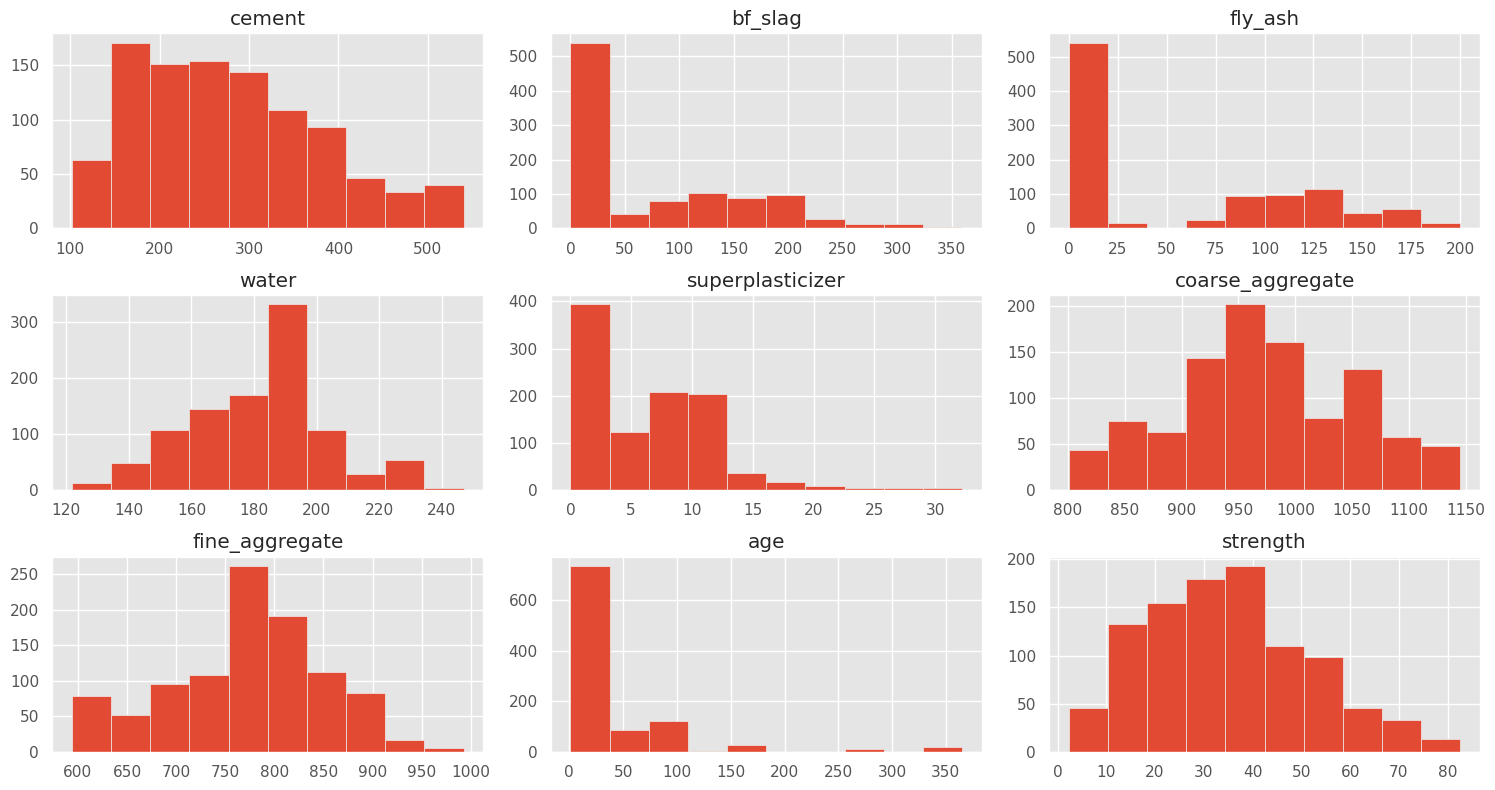

In [12]:
df.hist()
plt.tight_layout();

In [13]:
df.shape

(1005, 9)

**Minimum **

df[df['water_cement_ratio'] < 1/2]

plt.figure(figsize = (2,4))
df[df['water_cement_ratio'] < 1/2][['strength', 'superplasticizer']].hist();

**Analysis**
>- There are some outlier values in `age` and `superplasticizer` features which may represent some extreme testing parameters. Neural Networks can typically overcome this problem for a relatively simple dataset as this.
>- A large number of `bf_slag` and `fly ash` features have zero values, which implies some concrete samples are devoid of this additives. From the information we've gathered from external research, we understand that these compoents are necessary for increasing concrete strength. 

df[df['water_cement_ratio'] < 1/2][['strength', 'superplasticizer']].corr()

sns.pairplot(df[df['water_cement_ratio'] < 1/2][['strength', 'superplasticizer']],
            diag_kind = 'kde',  kind = 'reg'
            );



#sns.lmplot(x='superplasticizer', y='strength',
#           data=df[(df['water_cement_ratio'] < 1/2) & (df['superplasticizer'] > 0)], scatter_kws={'alpha':0.3})


Holding all else constant, **it was proven that strength of concrete increases with amount of superplasticizers,** (ref: papers shared in feature engineering section) due to increase in density and compaction. While there is a general positive correlation between the two features, the strength of correlation is not that high due to variability of other features, within the dataset and external confounding features.

**4.2 Bivariate Analysis**

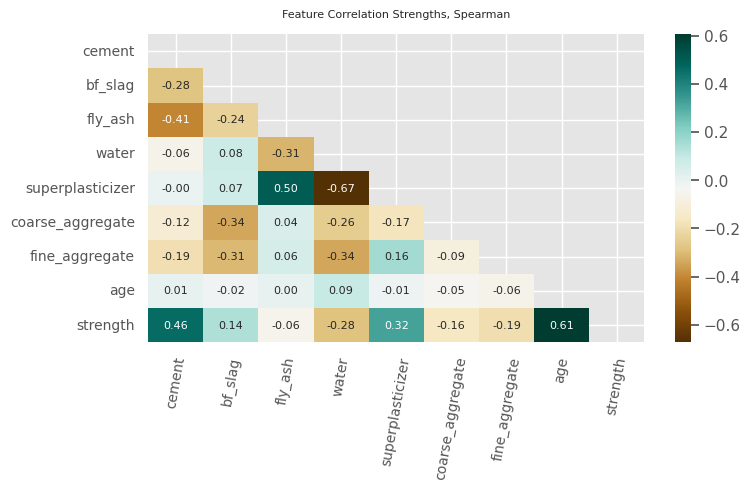

<Figure size 1500x800 with 0 Axes>

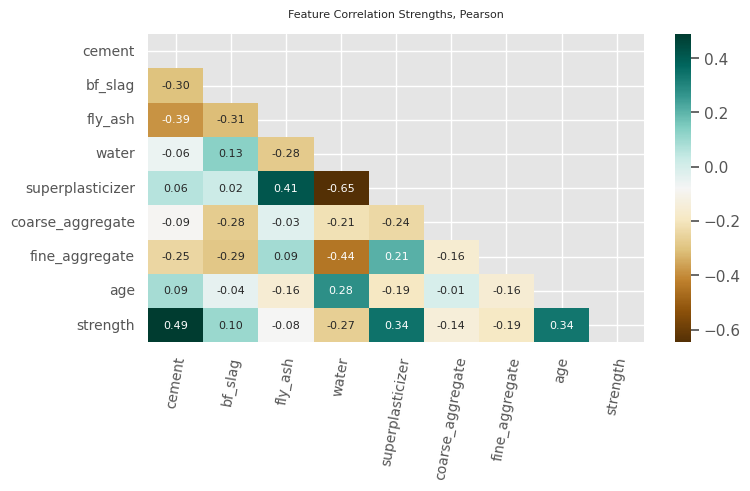

<Figure size 1500x800 with 0 Axes>

In [14]:
## Customizable correlaton heatmap function with Spearman and Pearson Correlation Coefficients

def corr_map(df, title, method='spearman', numeric_only = True, tick_size = 10, annot_size=8, annot_kws=8):
    mask = np.triu(np.ones_like(df.corr(numeric_only=numeric_only), dtype=bool))
    heatmap = sns.heatmap(df.corr(method=method, numeric_only = numeric_only), fmt = '.2f',  annot = True, annot_kws = {'size': annot_kws}, mask=mask, cmap='BrBG')#
    plt.xticks(rotation=80, fontsize= tick_size)
    plt.yticks( fontsize= tick_size)

    heatmap.set_title(title, fontdict={'fontsize':annot_size}, pad=12)
    plt.show();
    
plt.figure(figsize=(8,4))
corr_map(df, 'Feature Correlation Strengths, Spearman', method='spearman')
plt.savefig('Concrete Strength - Spearman Correlation.png')

plt.figure(figsize=(8,4))
corr_map(df, 'Feature Correlation Strengths, Pearson', method='pearson')
plt.savefig('Concrete Strength - Pearson Correlation.png');

**Abrams' Law is a widely recognized empirical relationship** that estimates the compressive strength of concrete based on the water-cement ratio. The relationship is typically expressed as follows:

`S = K * (W/C)^n`

where:
- S is the compressive strength of concrete,
- W/C is the water-cement ratio,
- K and n are empirical constants.

The values of K and n can vary depending on several factors, including the type of cement, aggregate, and curing conditions. However, commonly used values for K and n in Abrams' Law are:

- K: Typically ranges from 20 to 40 for normal strength concrete.
- n: Typically ranges from 0.5 to 0.7 for normal strength concrete.
- W/C: Abram’s law holds good ratio over a range of w/c ratio of 0.3 to 1.20

**Correlation Analysis:**
>- **`water` and `superplasticizer` inversely related**, from the domain understanding. In this dataset, it is confirmed to be true with a -0.67 spearman correlation coeffiient. Superplasticizer improves workability, and desity of concrete.
>- **`superplastcizer` and `strength`** are positively correlated. 
>- Addition of **`cement` definitely increases concrete `strength`**, which is evident from the correlation heatmap.
>- **`water` and `fine_aggregate`:** The amount of water (which is added to the mix) is decided after evaluating the moisture content which is present in the fine aggregate materials. The suitable moisture condition of an aggregate can be categorized into different moisture conditions which are, Oven Dry, Air-Dry, Saturated-Surface Dry, and Wet. It makes sense that these feaatures are inversely correlated.
>- **Fly ash typically improves modulus of elasticity and workability of concrete.** While it induces undesirable creep, i is negligible upto 15% fly ash component. As such, it is **used along with `superplasticizer` and is strongly, positively correlated** and **inversely correlated with `water`** content.
>- Modification in the mechanical strength by increase in later age strength and durability properties by increase of the concrete was observed with the addition of fly ash and superplasticizer in control mix. We will recheck this during multivariate analysis.
>- At constant W/C ratio, `coarse_aggregate` increases `strength`. But suchb a relation is not visible from the correlation heatmap. We will check this.


sns.regplot(df, x = 'log_strength', y = 'water_cement_ratio');

g = sns.pairplot(df, kind = 'reg')
g.map_upper(sns.kdeplot, levels = 6, alpha = 0.8, fill = True)
plt.suptitle('Feature pairplots', y = 1)

plt.savefig('Feature pairplots.png')
plt.tight_layout()
plt.show();

**While projecting n-dimensional data onto a 2-dimensional plane may not give us the best analyses, We can definitely see some linearity among the original independent features. This confirms our earlier analyses that addition or removal of certain concrete components are correlated.**


<a id = '5'></a>
# [5 Model Training and Performance](#0)


<a id = '5.1'></a>
# [5.1 Feature Selection](#0)

In [15]:
df.head()

,cement,bf_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.000,0.000,0.000,162.000,2.500,1040.000,676.000,28,79.990
1,540.000,0.000,0.000,162.000,2.500,1055.000,676.000,28,61.890
2,332.500,142.500,0.000,228.000,0.000,932.000,594.000,270,40.270
3,332.500,142.500,0.000,228.000,0.000,932.000,594.000,365,41.050
4,198.600,132.400,0.000,192.000,0.000,978.400,825.500,360,44.300


[](http://)## We will ignore slag_ash_mix featres since it is a linearly dependent feature
features_1 = ['cement', 'bf_slag', 'fly_ash', 'water', 'superplasticizer',
              'coarse_aggregate', 'fine_aggregate', 'age']
features_2 = ['water_cement_ratio', 'water_fineagg_ratio',
              'cement_fineagg_ratio', 'cement_coarseagg_ratio',
              'coarse_fine_agg_ratio']
target = ['strength']

## Normalizing feature grourp 1 to their z-score values
df[features_1]  = (df[features_1] - df[features_1].mean())/df[features_1].std()

<a id = '5.2'></a>
# [5.2 Building the Neural Network](#0)

In [16]:
## Keras and Tensorflow
import tensorflow as tf
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense

from keras.utils import plot_model

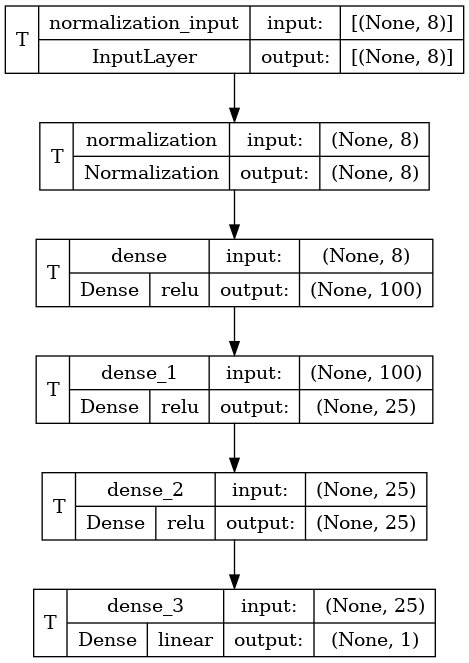

In [17]:
ncols = df.shape[1]-1

from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.metrics import MeanSquaredError

rmsprop = RMSprop()

df_num = np.array(df)

df_normalizer = tf.keras.layers.Normalization(input_shape=[8,], axis=None)
df_normalizer.adapt(df_num)

def nn_regression(ncols = ncols):
    model = Sequential()
    model.add(df_normalizer)
    model.add(Dense(100, activation = 'relu', input_shape = (ncols, 1)))
    model.add(Dense(25, activation = 'relu'))
    model.add(Dense(25, activation = 'relu'))
    model.add(Dense(1))
    
    ## Compile model
    model.compile(optimizer = 'rmsprop', loss = 'mean_squared_error', metrics = ['mean_squared_error'])
    
    return model

model = nn_regression()

plot_model(model, to_file = 'neural_network_regression.png', show_layer_activations=True,
            show_trainable=True, show_shapes=True, show_layer_names=True)

<a id = '5.3'></a>
# [5.3 Training the Neural Network](#0)

In [18]:
class myCallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('val_accuracy') is not None and logs.get('val_accuracy') >= 0.85):
            print('\nReached 85% validation accuracy, terminating training')
            self.model.stop_training = True
  
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor="mean_squared_error", patience = 15)

In [19]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

callbacks = myCallbacks()

%time
history = model.fit(X, y, validation_split = 0.3, epochs=400, verbose=2,
                   batch_size=10, callbacks=[callbacks, early_stopping])
%time

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.3 µs
Epoch 1/400
71/71 - 1s - loss: 1015.8881 - mean_squared_error: 1015.8881 - val_loss: 206.9873 - val_mean_squared_error: 206.9873 - 1s/epoch - 20ms/step
Epoch 2/400
71/71 - 0s - loss: 309.0997 - mean_squared_error: 309.0997 - val_loss: 193.4128 - val_mean_squared_error: 193.4128 - 221ms/epoch - 3ms/step
Epoch 3/400
71/71 - 0s - loss: 292.6709 - mean_squared_error: 292.6709 - val_loss: 175.9232 - val_mean_squared_error: 175.9232 - 210ms/epoch - 3ms/step
Epoch 4/400
71/71 - 0s - loss: 279.7568 - mean_squared_error: 279.7568 - val_loss: 176.9284 - val_mean_squared_error: 176.9284 - 230ms/epoch - 3ms/step
Epoch 5/400
71/71 - 0s - loss: 263.6888 - mean_squared_error: 263.6888 - val_loss: 160.1223 - val_mean_squared_error: 160.1223 - 232ms/epoch - 3ms/step
Epoch 6/400
71/71 - 0s - loss: 248.7590 - mean_squared_error: 248.7590 - val_loss: 156.6327 - val_mean_squared_error: 156.6327 - 232ms/epoch - 3ms/step
Epoch 7/400
71/71 - 0s - 

<a id = '5.4'></a>
# [5.4 Evaluating the model performance](#0)

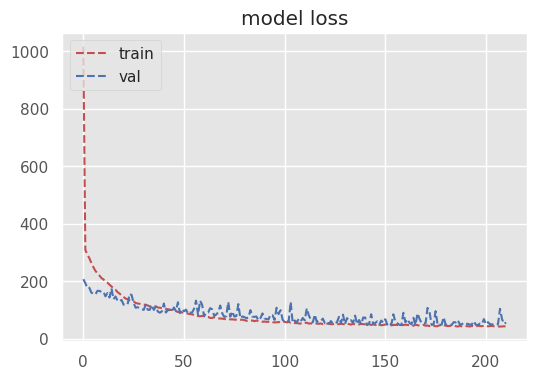

In [20]:
# summarize history for loss

plt.figure(figsize = (6,4))
plt.plot(history.history['loss'], 'r--')
plt.plot(history.history['val_loss'], 'b--')
plt.title('model loss')

plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [21]:
model.save('concrete_strength_prediction_NN.h5')

# Yayy!! We have successfully built a neural network for regression that performs reasonably well.